This project is about analyzing the causes of fires in California, particularly mand-made vs. natural, to attempt to predict when fires might be likelier to occur. This project will be analyzing the scale and location of the fires, comparing those factors to the cause, and attempt to find trends that might indicate when/where a fire is likelier to break out.

[insert rationale for why certain data sets were used and how they were prepared after actually doing the work below]
There are two datasets strictly about fires that are going to be looked at. The first is a record of all fires dating back from 1878, although this will be clipped to 1950 to present to match the data available for lightning occurences in California. Both of these datasets have location data, so we can compare yearly fires and thunderstorm occurences for specific regions. This allows us to understand how much of a threat, in terms of fire likelihood, lightning can be. Additionally, there are two more data sets that analyze small(<5000 acres) and large(>=5000 acres) fires over the past five years, so we can focus on both very broad trends over many years, as well as more recent trends that might better help us predict the immediate future.

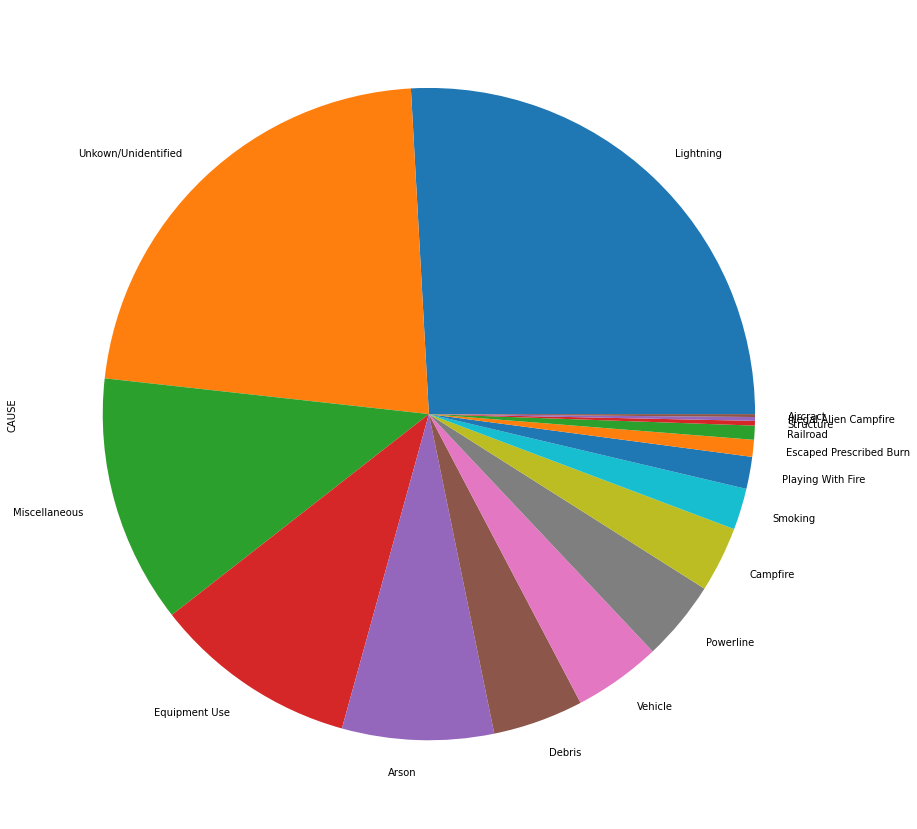

        YEAR_              ALARM_DATE               CONT_DATE  \
0      2020.0  2020/06/18 00:00:00+00  2020/06/23 00:00:00+00   
1      2020.0  2020/06/01 00:00:00+00  2020/06/04 00:00:00+00   
2      2020.0  2020/08/10 00:00:00+00  2020/03/01 00:00:00+00   
3      2020.0  2020/03/31 00:00:00+00  2020/04/01 00:00:00+00   
4      2020.0  2020/04/14 00:00:00+00  2020/04/19 00:00:00+00   
...       ...                     ...                     ...   
21312  2019.0  2019/10/21 00:00:00+00  2019/10/22 00:00:00+00   
21314  2019.0  2019/10/28 00:00:00+00  2019/10/28 00:00:00+00   
21315  2019.0  2019/11/09 00:00:00+00  2019/11/10 00:00:00+00   
21316  2019.0                     NaN                     NaN   
21317  2019.0  2019/10/10 00:00:00+00  2019/10/31 00:00:00+00   

                         CAUSE    GIS_ACRES                  C_METHOD  \
0                    Powerline   109.602500                GPS Ground   
1                Equipment Use   685.585020                GPS Ground   


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

#Causes
# 1 - Lightning
# 2 - Equipment Use
# 3 - Smoking
# 4 - Campfire
# 5 - Debris
# 6 - Railroad
# 7 - Arson
# 8 - Playing With Fire
# 9 - Miscellaneous
# 10 - Vehicle
# 11 - Powerline
# 12 - 
# 13 - 
# 14 - Unknown/Unidentified
causes = {1:"Lightning", 2:"Equipment Use", 3:"Smoking", 4:"Campfire", 5:"Debris", 6:"Railroad", 7:"Arson", 8:"Playing With Fire",
          9: "Miscellaneous", 10:"Vehicle", 11:"Powerline", 12:"DNE", 13:"DNE", 14:"Unkown/Unidentified", 15:"Structure", 16:"Aircract", 18:"Escaped Prescribed Burn", 19:"Illegal Alien Campfire"}
#C_Method
# 1 - GPS Ground
# 2 - GPS Air
# 3 - Infrared
# 4 - Other Imagery
# 5 - Photo Interpretation
# 6 - Hand Drawn
# 7 - Mixed Collection Methods
# 8 - Unknown
C_Methods = {1.0:"GPS Ground", 2.0:"GPS Air", 3.0:"Infrared", 4.0:"Other Imagery", 5.0:"Photo Interpretation", 6.0:"Hand Drawn", 7.0:"Mixed Collection Methods", 8:"Unknown"}

#declaring a list of columns we dont care about to remove later
ignoreLabels = ["OBJECTID", "STATE", "AGENCY" , "UNIT_ID",  "FIRE_NAME", "INC_NUM", "COMMENTS", "REPORT_AC", "OBJECTIVE", "FIRE_NUM"]

#getting the .csv data as pandas dataframe
firesAll = pd.read_csv("California_Fire_Perimeters_(all).csv")

#cleaning the data
firesAll.drop(labels=ignoreLabels, axis=1, inplace=True) #gets rid of columns that we know are not useful for this study
firesAll.CAUSE.replace(causes, inplace=True) #substitutes the number value for causes with the appropriate string
firesAll.C_METHOD.replace(C_Methods, inplace=True) #substitues provided number value for text description
firesAll.dropna(axis=0, subset=["CAUSE"], inplace=True) #gets rid of rows in cause that do not exist
firesAll.dropna(axis=0, subset=["C_METHOD"], inplace=True) #gets rid of rows in c_method that do not exist
firesAll = firesAll[firesAll.CAUSE != "DNE"]

#prepping data for plotting
# causesCount = pd.DataFrame({"Lightning":firesAll["CAUSE"].value_counts})
causesCount = firesAll["CAUSE"].value_counts()
# print(causesCount)


#plot the data
#plot the pie chart for causes to determine which are most prevalent
pieCauses = causesCount.plot(kind="pie", figsize=(15,15)) 

plt.show()

print(firesAll)

As seen in the above graph, a large portion of fires with identifiable causes were from lightning as supposed to being caused by human intervention. However, is it wise to focus more resources on fire fighting when storms are present, as supposed to maintaining vigilance for other causes? In an attempt to answer this question, we will be comparing the amount of land lost for various causes compared to lightning-caused fires when that data is available. By determining which types of fire are more destructive, we can better discern where to be focus our efforts for prevention and recovery.

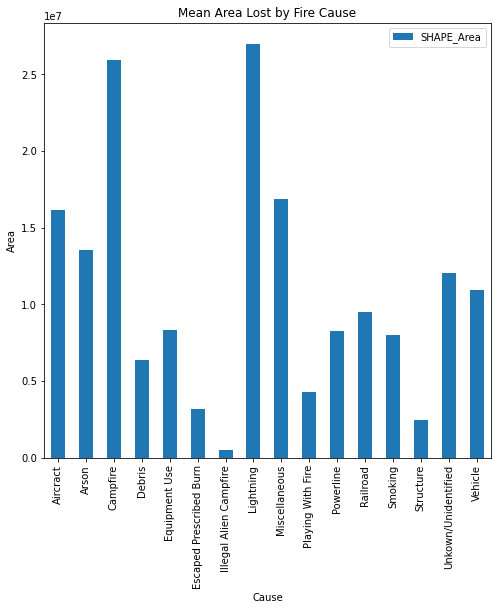

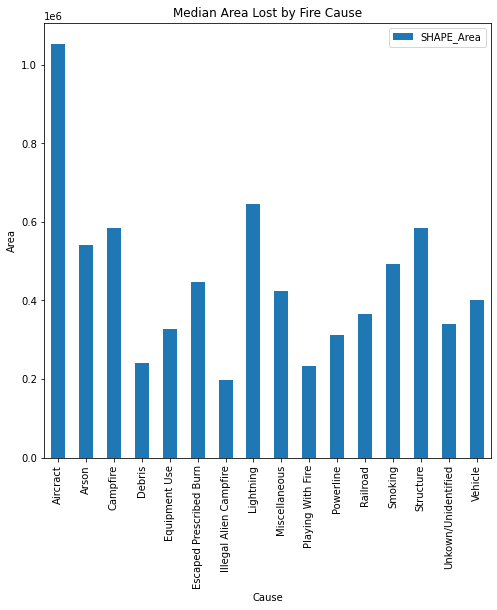

                           SHAPE_Area
CAUSE                                
Aircract                 1.617782e+07
Arson                    1.354105e+07
Campfire                 2.590246e+07
Debris                   6.355037e+06
Equipment Use            8.356924e+06
Escaped Prescribed Burn  3.173213e+06
Illegal Alien Campfire   4.840748e+05
Lightning                2.700494e+07
Miscellaneous            1.684443e+07
Playing With Fire        4.295958e+06
Powerline                8.239776e+06
Railroad                 9.520189e+06
Smoking                  7.966300e+06
Structure                2.478030e+06
Unkown/Unidentified      1.205335e+07
Vehicle                  1.095886e+07
                           SHAPE_Area
CAUSE                                
Aircract                 1.053417e+06
Arson                    5.417860e+05
Campfire                 5.844901e+05
Debris                   2.397870e+05
Equipment Use            3.282212e+05
Escaped Prescribed Burn  4.462325e+05
Illegal Alie

In [40]:
# ignoreLabelsStorm = ["BEGIN_RANGE","END_RANGE","EVENT_ID","CZ_NAME_STR","MAGNITUDE","TOR_F_SCALE","DEATHS_DIRECT","INJURIES_DIRECT","DAMAGE_PROPERTY_NUM","DAMAGE_CROPS_NUM","STATE_ABBR","CZ_TIMEZONE","MAGNITUDE_TYPE","EPISODE_ID","CZ_TYPE","CZ_FIPS","WFO","INJURIES_INDIRECT","DEATHS_INDIRECT","FLOOD_CAUSE","TOR_LENGTH","TOR_WIDTH","BEGIN_AZIMUTH","END_AZIMUTH","BEGIN_LAT","BEGIN_LON","END_LAT","END_LON","EVENT_NARRATIVE","EPISODE_NARRATIVE","ABSOLUTE_ROWNUMBER"]

# stormsAll = pd.read_csv("storm_data_search_results.csv", on_bad_lines="skip")
# stormsAll.drop(labels=ignoreLabelsStorm, inplace=True, axis=1)



# print(stormsAll)
nonLightning = ["SHAPE_Length", "C_METHOD", "GIS_ACRES", "YEAR_", "ALARM_DATE", "CONT_DATE"]
damageStorm = firesAll.drop(labels=nonLightning, axis=1)
damageStorm["SHAPE_Area"] = damageStorm["SHAPE_Area"].apply(lambda x: x * -1)

damageMean = damageStorm.groupby(["CAUSE"]).mean()#.sort_values(by="SHAPE_Area", axis=1, inplace=True)
damageMedian = damageStorm.groupby(["CAUSE"]).median()#.sort_values(by="SHAPE_Area", axis=1, inplace=True)

damageMeanPlot = damageMean.plot(kind="bar", figsize=(8,8), xlabel="Cause", ylabel="Area", title="Mean Area Lost by Fire Cause")
damageMedianPlot = damageMedian.plot(kind="bar", figsize=(8,8), xlabel="Cause", ylabel="Area", title="Median Area Lost by Fire Cause")

plt.show()

print(damageMean)
print(damageMedian)

print(damageStorm)

These graphs indicate that lightning is both a frequent cause of fires, and that those fires also consume large amounts of land on average while also having a high median amount of land burned. It is fascinating to see that airplanes have such high numbers as well, despite their drastically low occurance count, literally being the least common cause. Additionally, other common human-caused fires, such as fires caused by equipment use, have relatively low amounts of land destroyed compared to other causes. Essentially, due to lightnings presence as a cause and the amount of damage that it can cause, it would be wise to acknowledge the threat that storms cause in terms of forest fires. One of the immediate thoughts that comes to mind about how to contain these fires is to have as little delay as possible between when we know where a fire is and when it actually begins. Next, we will examine how many fires caused by storms have their alarms sound on the same date as the storm. The more fires with alarm dates that match the date of the storm indicates that we do a good job knowning when and where to look for fires caused by storms, whereas a difference between the two indicates that we need to be better prepared to scan for fires in the timeframe immediately following a storm.